<b>¡Hola Nelson!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Paso 1

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

In [2]:
# Leer el archivo CSV
ruta_archivo = '/datasets/logs_exp_us.csv'
datos = pd.read_csv(ruta_archivo, sep='\t')

Primero lo que se realizo fue cargar todas las librerias a usar durante el trabajo. Posteriormente se cargo el archivo del dataframe, en este caso se tuvo que cambiar el separador ya que no se encontraba separado por "," sino por "\t".

# Paso 2

In [3]:
# Preprocesamiento inicial
datos['EventTimestamp'] = pd.to_datetime(datos['EventTimestamp'], unit='s')  # Convertir timestamp
datos.rename(columns={
    'EventName': 'evento',
    'DeviceIDHash': 'usuario_id',
    'EventTimestamp': 'timestamp',
    'ExpId': 'grupo_experimento'
}, inplace=True)  # Renombrar columnas
datos['hora'] = datos['timestamp']  # Crear columna con fecha y hora
datos['fecha'] = datos['timestamp'].dt.date  # Crear columna solo con fecha

In [4]:
# Verificar información del DataFrame
print(datos.info())  # Información general sobre columnas y tipos de datos
print(datos.describe())  # Estadísticas descriptivas de las columnas numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   evento             244126 non-null  object        
 1   usuario_id         244126 non-null  int64         
 2   timestamp          244126 non-null  datetime64[ns]
 3   grupo_experimento  244126 non-null  int64         
 4   hora               244126 non-null  datetime64[ns]
 5   fecha              244126 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 11.2+ MB
None
         usuario_id  grupo_experimento
count  2.441260e+05      244126.000000
mean   4.627568e+18         247.022296
std    2.642425e+18           0.824434
min    6.888747e+15         246.000000
25%    2.372212e+18         246.000000
50%    4.623192e+18         247.000000
75%    6.932517e+18         248.000000
max    9.222603e+18         248.000000


Se realizó un análisis general del DataFrame, observándose que no existen valores NaN en las columnas. Como siguiente paso, se procedió a simplificar los nombres de las columnas, ya que actualmente son complejos, lo que facilita su uso y manejo. Además, se llevará a cabo la conversión de los datos de tipo fecha al formato timestamp para optimizar su procesamiento.

<div class="alert alert-block alert-success">
<b>Celdas [1–4]</b> <a class="tocSkip"></a><br>
Excelente inicio, Nelson. Mostraste un enfoque cuidadoso desde el preprocesamiento: importaste los datos correctamente, ajustaste el separador de columnas, renombraste encabezados con nombres intuitivos y convertiste los timestamps a formatos adecuados. También confirmaste la ausencia de nulos con dos métodos distintos.
</div>


In [5]:
#Verificar datos nulos
print(datos.isnull().sum())

evento               0
usuario_id           0
timestamp            0
grupo_experimento    0
hora                 0
fecha                0
dtype: int64


Si bien se obtuvo, al usar la función info(), que no existían datos NaN, se realizó, mediante el código anterior, la suma de todos los valores nulos, confirmando que el DataFrame se encuentra completo.

In [6]:
# Separar los datos por grupo experimental
grupo_A1 = datos[datos['grupo_experimento'] == 246]
grupo_A2 = datos[datos['grupo_experimento'] == 247]
grupo_B = datos[datos['grupo_experimento'] == 248]

In [7]:
conteo_grupos = datos['grupo_experimento'].value_counts()
print("Conteo de registros por grupo experimental:")
print(conteo_grupos)

Conteo de registros por grupo experimental:
248    85747
246    80304
247    78075
Name: grupo_experimento, dtype: int64


<div class="alert alert-block alert-success">
<b>Celdas [6–7]</b> <a class="tocSkip"></a><br>
Muy bien hecho al dividir los datos por grupos experimentales y validar que el reparto entre ellos sea relativamente homogéneo. Esta verificación es clave antes de cualquier comparación estadística posterior.
</div>


En los siguientes pasos, se verificó que todos los grupos fueran proporcionalmente similares, ya que es fundamental, en los análisis posteriores, garantizar que no exista ninguna anomalía que pueda alterar los resultados de las pruebas. Se obtuvieron los siguientes números de eventos: grupo 248 = 85,747, grupo 246 = 80,304 y grupo 247 = 78,075, respectivamente. Con estos códigos, se logró obtener una primera visión general del DataFrame de la prueba A/A/B, y los datos fueron tratados para facilitar los análisis posteriores.

# Paso 3

In [8]:
# Análisis de eventos y usuarios
# Total de eventos
total_eventos = len(datos)
print(f"Total de eventos en los registros: {total_eventos}")

Total de eventos en los registros: 244126


In [9]:
# Total de usuarios
total_usuarios = datos['usuario_id'].nunique()
print(f"Total de usuarios únicos en los registros: {total_usuarios}")

Total de usuarios únicos en los registros: 7551


Después de completar los primeros pasos con el DataFrame, se procedió a implementar un código que permitiera acceder al número total de registros y al número de usuarios únicos en los mismos. Como resultado, se obtuvieron 244,126 registros y 7,551 usuarios únicos, respectivamente. El hecho de que el número de usuarios únicos sea considerablemente menor al total de eventos se debe a que un usuario no se asocia únicamente con un evento, sino con varios eventos que, generalmente, están secuencialmente relacionados, algo que exploraremos más adelante.

In [10]:
# Promedio de eventos por usuario
promedio_eventos = total_eventos / total_usuarios
print(promedio_eventos)

32.33028737915508


In [11]:
# Encontrar fecha mínima y máxima
fecha_min = datos['timestamp'].min()
fecha_max = datos['timestamp'].max()
print(f"El periodo de tiempo de los datos es desde {fecha_min} hasta {fecha_max}")

El periodo de tiempo de los datos es desde 2019-07-25 04:43:36 hasta 2019-08-07 21:15:17


Tal como se mencionó anteriormente, la cantidad promedio de eventos por usuario es de 32. Este valor indica que los usuarios realizan más de un evento registrado, aunque esto no refleja necesariamente la actividad real de los usuarios, ya que solo representa un número total. Para comprender cómo los usuarios interactúan con la plataforma, es necesario analizar la forma en que cada usuario registra los eventos.
Además, para tener un mejor entendimiento de los datos utilizados, se calculó el período de tiempo en el que ocurrieron los eventos, que abarca desde el 2019-07-25 04:43:36 hasta el 2019-08-07 21:15:17. Ahora, con estos datos temporales, es fundamental graficarlos para verificar que estén distribuidos de manera relativamente uniforme y asegurarnos de que no existan distorsiones que dificulten los análisis.

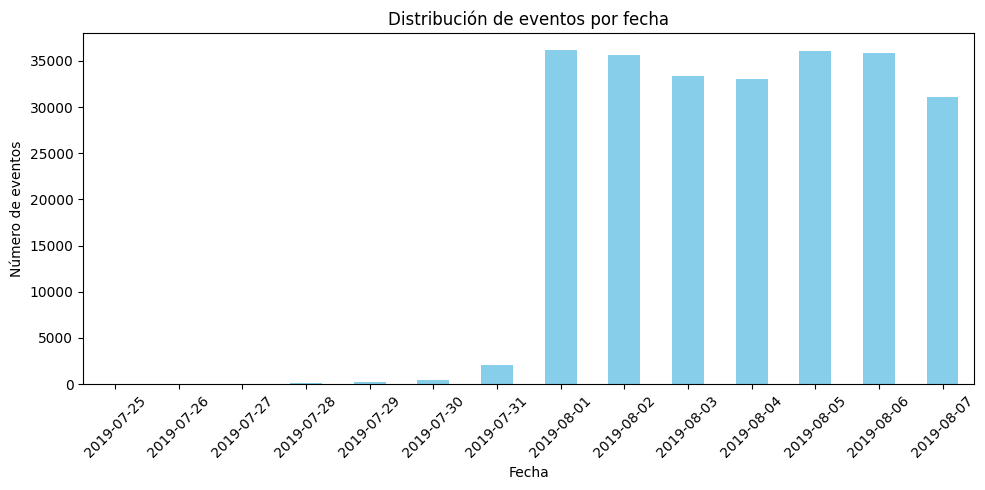

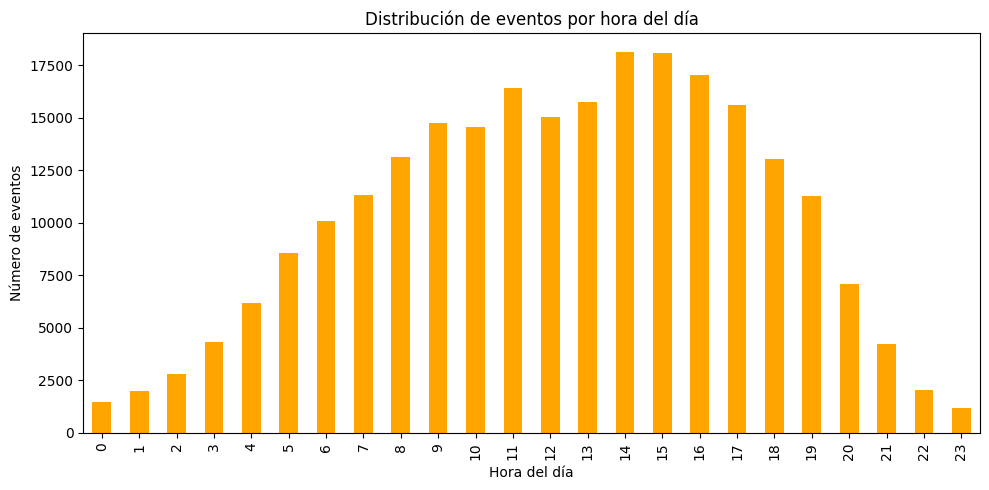

In [12]:
# Histograma por fecha
plt.figure(figsize=(10, 5))
datos['fecha'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de eventos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma por hora del día
plt.figure(figsize=(10, 5))
datos['hora'].dt.hour.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Distribución de eventos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de eventos')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

Como se mencionó anteriormente, era necesario analizar la distribución de los eventos según las fechas en que fueron creados. Los gráficos de eventos por día y hora nos ofrecen resultados muy importantes. En el caso del gráfico de eventos por hora, se observa una distribución normal, donde las horas con menor cantidad de eventos corresponden a las horas nocturnas, lo cual puede explicarse fácilmente por los hábitos de los usuarios. Sin embargo, en el gráfico de eventos por día, se observó que la cantidad de datos obtenidos durante los primeros días (del 27/7 al 31/7) es significativamente menor en comparación con los días siguientes. Esto sugiere que pudo haber un error en la recopilación de datos, lo cual podría distorsionar los análisis futuros.

In [13]:
# Conteo de eventos por fecha
eventos_por_fecha = datos['fecha'].value_counts().sort_index()
print("Conteo de eventos por fecha:")
print(eventos_por_fecha.head(10))  # Muestra las primeras fechas


Conteo de eventos por fecha:
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
Name: fecha, dtype: int64


Para corroborar lo mencionado anteriormente, se realizó el conteo de eventos, cuyos resultados se reflejan en el gráfico correspondiente. Dado que estos datos son significativamente menores en comparación con los días posteriores, se decidió excluirlos del análisis para evitar distorsionar los resultados.

In [14]:
# Filtrar datos a partir del 1 de agosto de 2019
fecha_inicio_confiable = '2019-08-01'
datos_completos = datos[datos['fecha'] >= pd.to_datetime(fecha_inicio_confiable)]

# Verificar el nuevo periodo representado por los datos
print(f"Nuevo periodo representado por los datos: {datos_completos['fecha'].min()} a {datos_completos['fecha'].max()}")
print(f"Total de eventos después del filtro: {len(datos_completos)}")

Nuevo periodo representado por los datos: 2019-08-01 a 2019-08-07
Total de eventos después del filtro: 241298


<div class="alert alert-block alert-success">
<b>Celdas [12–14]</b> <a class="tocSkip"></a><br>
Excelente análisis temporal. Utilizaste gráficos para validar la calidad y distribución de los datos por hora y fecha, y tu decisión de excluir los días iniciales con volúmenes atípicamente bajos fue justificada, ayudando a mejorar la confiabilidad del análisis posterior.
</div>


Aquí se muestra el filtro aplicado a las fechas, junto con el nuevo valor total de eventos obtenidos después de realizar dicho filtro.

In [15]:
# Filtrar datos por grupo experimental
grupo_A1_completo = datos_completos[datos_completos['grupo_experimento'] == 246]
grupo_A2_completo = datos_completos[datos_completos['grupo_experimento'] == 247]
grupo_B_completo = datos_completos[datos_completos['grupo_experimento'] == 248]

# Calcular y mostrar tamaños de los grupos filtrados
tamanos_grupos_completos = {
    'A1': len(grupo_A1_completo),
    'A2': len(grupo_A2_completo),
    'B': len(grupo_B_completo)
}
print("Tamaños de los grupos experimentales (datos filtrados):", tamanos_grupos_completos)

Tamaños de los grupos experimentales (datos filtrados): {'A1': 79425, 'A2': 77147, 'B': 84726}


Al igual que la primera vez que se realizó un filtro para contar la cantidad de eventos en cada grupo experimental, aquí se aplicó el mismo procedimiento para verificar que no hubiera distorsiones tras realizar el filtro basado en las fechas del experimento. A simple vista, se observa que todos los grupos presentan una pérdida de datos después de eliminar los registros previamente mencionados.

# Parte 4

In [16]:
# Calcular la frecuencia de cada evento en el dataset
frecuencia_eventos = datos_completos['evento'].value_counts()

# Mostrar los eventos ordenados por frecuencia
print("Frecuencia de eventos ordenados de mayor a menor:")
print(frecuencia_eventos)

Frecuencia de eventos ordenados de mayor a menor:
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: evento, dtype: int64


In [17]:
# Calcular la cantidad de usuarios únicos por evento
usuarios_por_evento = datos_completos.groupby('evento')['usuario_id'].nunique()

# Ordenar los eventos por número de usuarios únicos
usuarios_por_evento = usuarios_por_evento.sort_values(ascending=False)
print("Cantidad de usuarios únicos por evento (ordenados):")
print(usuarios_por_evento)

# Calcular la proporción de usuarios que realizaron la acción al menos una vez
total_usuarios = datos_completos['usuario_id'].nunique()
proporcion_por_evento = (usuarios_por_evento / total_usuarios) * 100
print("\nProporción de usuarios que realizaron cada evento al menos una vez:")
print(proporcion_por_evento)

Cantidad de usuarios únicos por evento (ordenados):
evento
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: usuario_id, dtype: int64

Proporción de usuarios que realizaron cada evento al menos una vez:
evento
MainScreenAppear           98.473586
OffersScreenAppear         60.963632
CartScreenAppear           49.561986
PaymentScreenSuccessful    46.973719
Tutorial                   11.149456
Name: usuario_id, dtype: float64


Para analizar los eventos de forma individual, se utilizó el siguiente código, cuyo objetivo es observar cada evento por separado y analizar cómo los distintos tipos de eventos siguen la métrica de un embudo.
Como resultado, se identificó que el evento 'MainScreenAppear' es el que cuenta con la mayor cantidad de registros, lo cual es completamente esperado. Esto se alinea con la lógica de secuencialidad de las funciones dentro de la página, donde los usuarios se van perdiendo progresivamente hasta llegar al proceso final representado por el evento 'PaymentScreenSuccessful'.
En el caso del evento 'Tutorial', este no sigue la lógica del embudo, ya que se trata de un evento independiente, lo cual puede explicar perfectamente el número de registros obtenidos.

In [18]:
# Crear un diccionario con usuarios únicos por evento
usuarios_por_evento = datos_completos.groupby('evento')['usuario_id'].nunique()

# Definir la secuencia de eventos
secuencia_embudo = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Calcular proporciones de manera sencilla
proporciones_embudo = {evento: usuarios_por_evento[evento] / usuarios_por_evento[secuencia_embudo[i - 1]]
                       for i, evento in enumerate(secuencia_embudo[1:], start=1)}

# Mostrar proporciones entre etapas del embudo
print("Proporciones entre etapas del embudo:")
for etapa, proporcion in proporciones_embudo.items():
    print(f"{etapa}: {proporcion:.2%}")

Proporciones entre etapas del embudo:
OffersScreenAppear: 61.91%
CartScreenAppear: 81.30%
PaymentScreenSuccessful: 94.78%


In [19]:
# Calcular porcentaje de usuarios que completan todo el viaje
usuarios_main_screen = datos_completos[datos_completos['evento'] == 'MainScreenAppear']['usuario_id'].nunique()
usuarios_payment_successful = datos_completos[datos_completos['evento'] == 'PaymentScreenSuccessful']['usuario_id'].nunique()

proporcion_viaje_completo = (usuarios_payment_successful / usuarios_main_screen) * 100

# Mostrar el resultado
print(f"Conclusión: Aproximadamente el {proporcion_viaje_completo:.2f}% de los usuarios completan todo el viaje desde el primer evento hasta el pago exitoso.")

Conclusión: Aproximadamente el 47.70% de los usuarios completan todo el viaje desde el primer evento hasta el pago exitoso.


<div class="alert alert-block alert-success">
<b>Celdas [16–19]</b> <a class="tocSkip"></a><br>
Tu análisis del embudo de conversión fue claro, estructurado y muy bien ejecutado. Calculaste correctamente proporciones entre etapas, identificaste puntos de fuga, y además explicaste con claridad el caso del evento `Tutorial`, que no sigue la lógica secuencial.
</div>


Para comprobar que realmente existe una pérdida de usuarios a medida que avanzan en la página, se utilizó un código que calcula el porcentaje de usuarios que pasa al siguiente evento secuencial. Los resultados obtenidos fueron los siguientes: del evento 'MainScreenAppear' al evento 'OffersScreenAppear', el 61% de los usuarios continúa al siguiente paso; del evento 'OffersScreenAppear' al evento 'CartScreenAppear', se obtuvo un 81.3%; y finalmente, del evento 'CartScreenAppear' al evento 'PaymentScreenSuccessful', un 94% de los usuarios completan el proceso.

# Paso 5

In [20]:
# Contar usuarios únicos por grupo experimental
usuarios_por_grupo = datos_completos.groupby('grupo_experimento')['usuario_id'].nunique()

# Mostrar el resultado
print("Cantidad de usuarios únicos por grupo experimental:")
print(usuarios_por_grupo)

Cantidad de usuarios únicos por grupo experimental:
grupo_experimento
246    2484
247    2513
248    2537
Name: usuario_id, dtype: int64


Para concluir el análisis de la prueba A/A/B, después de realizar los preanálisis del DataFrame, se procedió a realizar las pruebas estadísticas que permiten comparar los distintos grupos experimentales (A vs A y A vs B). En primer lugar, se aplicó un filtro a cada grupo basado en los usuarios únicos. Se obtuvo que la cantidad de usuarios únicos en cada grupo no presenta diferencias significativas, lo que indica que, inicialmente, los datos son adecuados para comenzar el análisis.

In [21]:
# Definir los datos para los grupos
grupo_246_usuarios = datos_completos[datos_completos['grupo_experimento'] == 246]['usuario_id'].nunique()
grupo_247_usuarios = datos_completos[datos_completos['grupo_experimento'] == 247]['usuario_id'].nunique()

# Crear tabla de contingencia para el evento más popular
tabla_contingencia = pd.DataFrame({
    'Grupo_246': [grupo_246_usuarios],
    'Grupo_247': [grupo_247_usuarios]
})

# Realizar prueba chi-cuadrado
chi2_stat, p_val, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Mostrar resultados
print(f"Estadístico chi-cuadrado: {chi2_stat:.2f}")
print(f"Valor p: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusión: Hay una diferencia estadísticamente significativa en la distribución de usuarios entre los grupos para este evento.")
else:
    print("Conclusión: No hay diferencia estadísticamente significativa en la distribución de usuarios entre los grupos para este evento.")

Estadístico chi-cuadrado: 0.00
Valor p: 1.0000
Conclusión: No hay diferencia estadísticamente significativa en la distribución de usuarios entre los grupos para este evento.


In [22]:
# Crear tabla de contingencia para eventos por grupo experimental
tabla_contingencia = pd.crosstab(datos_completos[datos_completos['grupo_experimento'].isin([246, 247])]['grupo_experimento'],
                                  datos_completos[datos_completos['grupo_experimento'].isin([246, 247])]['evento'])

# Realizar prueba chi-cuadrado
chi2_stat, p_val, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Mostrar resultados
print(f"Estadístico chi-cuadrado: {chi2_stat:.2f}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusión: Hay una diferencia estadísticamente significativa en la distribución de eventos entre los grupos 246 y 247.")
else:
    print("Conclusión: No hay una diferencia estadísticamente significativa en la distribución de eventos entre los grupos 246 y 247.")

Estadístico chi-cuadrado: 345.13
Grados de libertad: 4
Valor p: 0.0000
Conclusión: Hay una diferencia estadísticamente significativa en la distribución de eventos entre los grupos 246 y 247.


<div class="alert alert-block alert-success">
<b>Celdas [20–22]</b> <a class="tocSkip"></a><br>
Muy bien aplicada la prueba de chi-cuadrado para validar la homogeneidad entre grupos A/A. Además, mostraste dominio al construir tablas de contingencia tanto para usuarios como para eventos, lo cual refuerza la validez del experimento y la consistencia de los resultados.
</div>


In [23]:
# Calcular usuarios únicos para cada grupo
grupo_246_usuarios = datos_completos[datos_completos['grupo_experimento'] == 246]['usuario_id'].nunique()
grupo_247_usuarios = datos_completos[datos_completos['grupo_experimento'] == 247]['usuario_id'].nunique()

# Crear tabla de contingencia
tabla_contingencia = pd.DataFrame({
    'Grupo_246': [grupo_246_usuarios],
    'Grupo_247': [grupo_247_usuarios]
})

# Verificar la tabla de contingencia
print(tabla_contingencia)

# Realizar prueba chi-cuadrado
chi2_stat, p_val, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Mostrar resultados
print(f"Estadístico chi-cuadrado: {chi2_stat:.2f}")
print(f"Valor p: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusión: Hay una diferencia estadísticamente significativa en la distribución de usuarios entre los grupos para este evento.")
else:
    print("Conclusión: No hay diferencia estadísticamente significativa en la distribución de usuarios entre los grupos para este evento.")

   Grupo_246  Grupo_247
0       2484       2513
Estadístico chi-cuadrado: 0.00
Valor p: 1.0000
Conclusión: No hay diferencia estadísticamente significativa en la distribución de usuarios entre los grupos para este evento.


In [24]:
# Identificar eventos únicos
eventos = datos_completos['evento'].unique()

# Calcular métricas para el grupo experimental (248)
print("Análisis del grupo con fuentes alteradas (248):")
for evento in eventos:
    usuarios_evento = datos_completos[(datos_completos['grupo_experimento'] == 248) & (datos_completos['evento'] == evento)]['usuario_id'].nunique()
    total_usuarios = datos_completos[datos_completos['grupo_experimento'] == 248]['usuario_id'].nunique()
    proporcion = usuarios_evento / total_usuarios
    print(f"Evento: {evento}, Usuarios únicos: {usuarios_evento}, Proporción: {proporcion:.4f}")

Análisis del grupo con fuentes alteradas (248):
Evento: Tutorial, Usuarios únicos: 279, Proporción: 0.1100
Evento: MainScreenAppear, Usuarios únicos: 2493, Proporción: 0.9827
Evento: OffersScreenAppear, Usuarios únicos: 1531, Proporción: 0.6035
Evento: CartScreenAppear, Usuarios únicos: 1230, Proporción: 0.4848
Evento: PaymentScreenSuccessful, Usuarios únicos: 1181, Proporción: 0.4655


In [25]:
def comparar_grupos(evento, grupo_1, grupo_2, datos):
    """
    Compara las proporciones de usuarios únicos para un evento entre dos grupos.
    Realiza una prueba estadística.
    """
    # Filtrar datos
    usuarios_1 = datos[(datos['grupo_experimento'] == grupo_1) & (datos['evento'] == evento)]['usuario_id'].nunique()
    usuarios_2 = datos[(datos['grupo_experimento'] == grupo_2) & (datos['evento'] == evento)]['usuario_id'].nunique()

    # Verificar que haya datos
    if usuarios_1 == 0 or usuarios_2 == 0:
        print(f"No hay datos suficientes para comparar el evento {evento} entre los grupos {grupo_1} y {grupo_2}.")
        return

    # Calcular totales y proporciones
    total_1 = datos[datos['grupo_experimento'] == grupo_1]['usuario_id'].nunique()
    total_2 = datos[datos['grupo_experimento'] == grupo_2]['usuario_id'].nunique()
    proporcion_1 = usuarios_1 / total_1
    proporcion_2 = usuarios_2 / total_2

    # Prueba chi-cuadrado
    tabla = [[usuarios_1, total_1 - usuarios_1], [usuarios_2, total_2 - usuarios_2]]
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(tabla)

    # Mostrar resultados
    print(f"Evento: {evento}")
    print(f"Grupo {grupo_1}: Usuarios: {usuarios_1}, Proporción: {proporcion_1:.4f}")
    print(f"Grupo {grupo_2}: Usuarios: {usuarios_2}, Proporción: {proporcion_2:.4f}")
    print(f"Estadístico chi-cuadrado: {chi2_stat:.2f}, Valor p: {p_val:.4f}")
    if p_val < 0.05:
        print("Conclusión: Hay una diferencia estadísticamente significativa.")
    else:
        print("Conclusión: No hay diferencia estadísticamente significativa.")
    print("\n")
comparar_grupos('MainScreenAppear', 246, 247, datos_completos)

Evento: MainScreenAppear
Grupo 246: Usuarios: 2450, Proporción: 0.9863
Grupo 247: Usuarios: 2476, Proporción: 0.9853
Estadístico chi-cuadrado: 0.04, Valor p: 0.8495
Conclusión: No hay diferencia estadísticamente significativa.




In [26]:
print("Comparaciones con cada grupo de control:")
for evento in eventos:
    print(f"Comparación para el evento: {evento}")
    comparar_grupos(evento, 248, 246, datos_completos)  # Comparar experimental vs. control 246
    comparar_grupos(evento, 248, 247, datos_completos)  # Comparar experimental vs. control 247

Comparaciones con cada grupo de control:
Comparación para el evento: Tutorial
Evento: Tutorial
Grupo 248: Usuarios: 279, Proporción: 0.1100
Grupo 246: Usuarios: 278, Proporción: 0.1119
Estadístico chi-cuadrado: 0.03, Valor p: 0.8616
Conclusión: No hay diferencia estadísticamente significativa.


Evento: Tutorial
Grupo 248: Usuarios: 279, Proporción: 0.1100
Grupo 247: Usuarios: 283, Proporción: 0.1126
Estadístico chi-cuadrado: 0.06, Valor p: 0.7997
Conclusión: No hay diferencia estadísticamente significativa.


Comparación para el evento: MainScreenAppear
Evento: MainScreenAppear
Grupo 248: Usuarios: 2493, Proporción: 0.9827
Grupo 246: Usuarios: 2450, Proporción: 0.9863
Estadístico chi-cuadrado: 0.87, Valor p: 0.3507
Conclusión: No hay diferencia estadísticamente significativa.


Evento: MainScreenAppear
Grupo 248: Usuarios: 2493, Proporción: 0.9827
Grupo 247: Usuarios: 2476, Proporción: 0.9853
Estadístico chi-cuadrado: 0.40, Valor p: 0.5294
Conclusión: No hay diferencia estadísticament

<div class="alert alert-block alert-success">
<b>Celdas [24–26]</b> <a class="tocSkip"></a><br>
La función `comparar_grupos()` que creaste demuestra un excelente manejo técnico. Reutilizaste código de manera eficaz para realizar múltiples pruebas de hipótesis sobre proporciones, y documentaste con claridad tus conclusiones sobre cada evento.
</div>


Para corroborar que las comparaciones entre los grupos están explicadas por el azar y no por un evento específico, se realizaron diversas pruebas estadísticas. Al comparar los dos grupos de control (A), se encontró que ambos son estadísticamente homogéneos, lo que valida el diseño experimental en el contexto de la prueba A/A.
En los análisis posteriores, al comparar los grupos A y B, se observó que no existen diferencias significativas entre ellos, por lo que sería necesario revisar qué pudo haber generado estos resultados.
Al analizar los eventos específicos, se comprobó que, a medida que los usuarios avanzan por los distintos eventos registrados en el ensayo, se produce una pérdida progresiva de usuarios. Este comportamiento es lo esperado en este tipo de pruebas, ya que refleja la lógica de un embudo de conversión.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy bien hecho, Nelson! Este proyecto destaca por su limpieza estructural, profundidad analítica y claridad en la presentación. Demostraste una excelente comprensión de conceptos como preprocesamiento, embudo de conversión, diseño experimental y validación estadística. Tus conclusiones están bien sustentadas, y el uso de visualizaciones y pruebas estadísticas refuerzan la solidez del análisis. ¡Felicitaciones por completar uno de los proyectos más exigentes del bootcamp con este nivel de calidad!
</div>
